In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [93]:
X,Y = make_classification(n_classes=2,n_samples=400,n_features=2,n_informative=2,n_redundant=0,random_state=3,n_clusters_per_class=1)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]


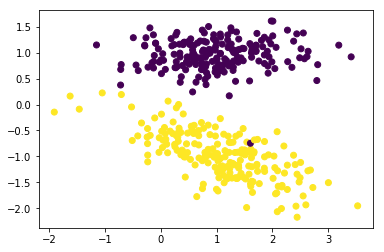

In [94]:
plt.scatter(X[:,0],X[:,1],c=Y)
print(Y)

In [95]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
                
                    
        

In [96]:
mySVM = SVM()

In [100]:
W,b,losses=mySVM.fit(X,Y,maxItr=100)

In [101]:
print(losses)

[400.0, 279.0912391754041, 232.94458725672558, 223.0041642419045, 217.54710794704218, 213.80603516833696, 211.3460837906014, 209.79609365396115, 208.77032398950536, 208.00919022217707, 207.31846390710317, 206.78506710870798, 206.26275599161295, 205.8032635688224, 205.47460358754552, 205.15502889031296, 204.89683297504584, 204.66627323385043, 204.46238057831548, 204.26069997636952, 204.05929650886478, 203.8582452072482, 203.65741481782948, 203.47803637470398, 203.3322393956223, 203.21283459349138, 203.0937810819776, 202.97492575138972, 202.85635137475322, 202.7483163464211, 202.640668317251, 202.53332682494855, 202.42626164142933, 202.31951082969417, 202.21302526031462, 202.1068359204664, 202.00096887348, 201.89537662693738, 201.79003499021792, 201.6918746564931, 201.61686554471177, 201.54209005477747, 201.46755159731111, 201.39798652215572, 201.37429435195008, 201.35066892334342, 201.32713641559417, 201.3036747479874, 201.2802828134916, 201.25696070967518, 201.23370493235208, 201.21052

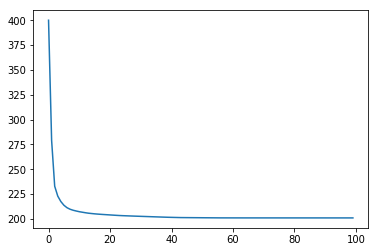

In [102]:
plt.plot(losses)
plt.show()

In [103]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[ 0.00138097 -0.33596961]] 1.0899999999999959


In [112]:
def plotHyperplane(w1,w2,b):
    x_1=np.linspace(-2,4,10)
    x_2=-(w1*x_1+b)/w2
    
    plt.plot(x_1,x_2)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

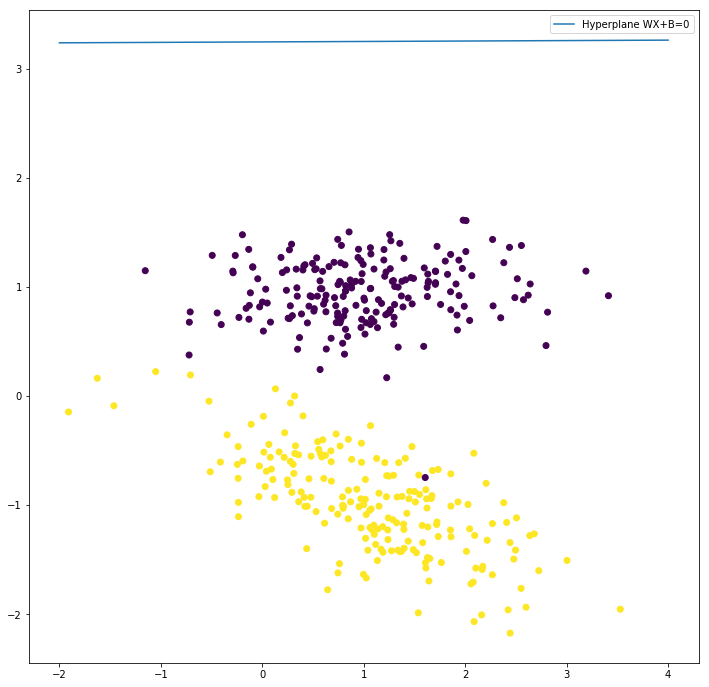

In [113]:
plotHyperplane(W[0,0],W[0,1],B)